In [1]:
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Add the parent directory of LinearDecoder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from LinearDecoder import funcs
from scripts import generate_data
from scripts import plots

In [2]:
rng_decode = np.random.default_rng(np.random.SeedSequence(entropy=654321, spawn_key=(0, 1, 3, 1)))

In [3]:

# Set parameters
n_neurons = 10000
duration = 200  # ms
dt = 0.1  # ms
avg_rate = 30  # Hz

spike_1 = generate_data.dummy_spiketimes(n_neurons, duration, dt, avg_rate)

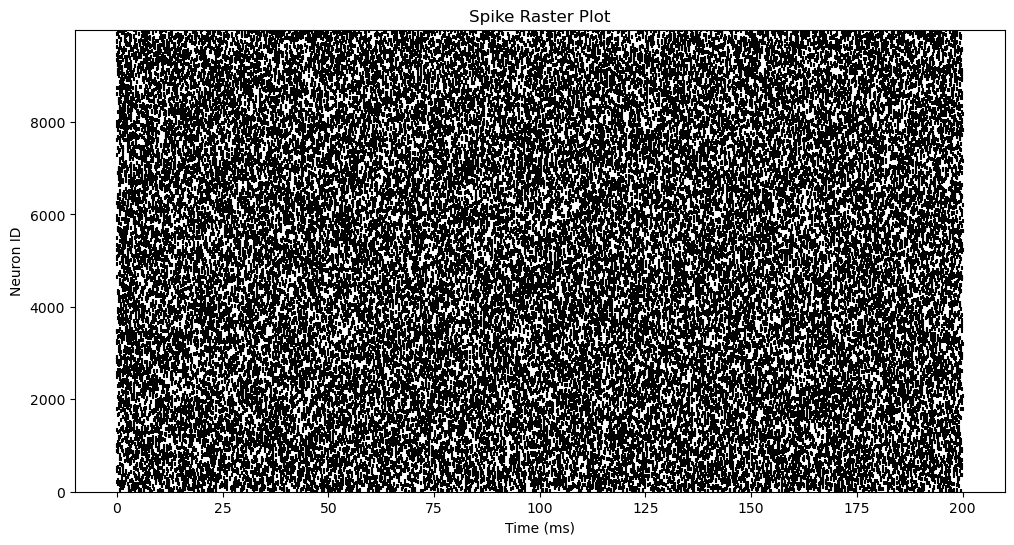

In [4]:
plots.plot_raster(spike_1)

In [5]:
# spikes_trials_all = []
# for trial in range(1,5):
#     filename = f"/Users/frazi/scripts/HLIF_6_mac/data/perturbed_simulations_V_th_std_{2.0}_trial_{trial}_session_{0}.pkl"
#     with open(filename, 'rb') as f:
#         data = pickle.load(f)
#     spike_1 = data["spikes"]
#     spikes_trials_all.append(spike_1)

In [6]:
spikes_trials_all = []
for trial in range(1,5):
    spike_1 = generate_data.dummy_spiketimes(n_neurons, duration, dt, avg_rate)
    spikes_trials_all.append(spike_1)

In [7]:
n_steps = int(duration/dt)

In [8]:
spike_matrices = np.array([funcs.spikes_to_matrix(trial_spikes, n_steps, n_neurons, dt) for trial_spikes in spikes_trials_all])

In [9]:
tau = 10
kernel = np.exp(-np.arange(0, 5 * tau, dt) / tau)
filtered_spikes_training_trials = funcs.filter_spikes_exp_kernel(spike_matrices, kernel)

In [10]:
time = np.arange(n_steps) * dt

# Generate base sine wave with a period of 400 ms
frequency = 2.5  # 2.5 Hz for 400 ms period
base_sine = 2 * np.sin(2 * np.pi * frequency * time / 1000)

# Keep only the upper half of the sine wave
signal1 = np.maximum(base_sine, 0)
signal2 = 4 * np.sin(4 * np.pi * frequency * time / 1000)

In [11]:
signal = np.append(signal1,signal2).reshape(2,n_steps)

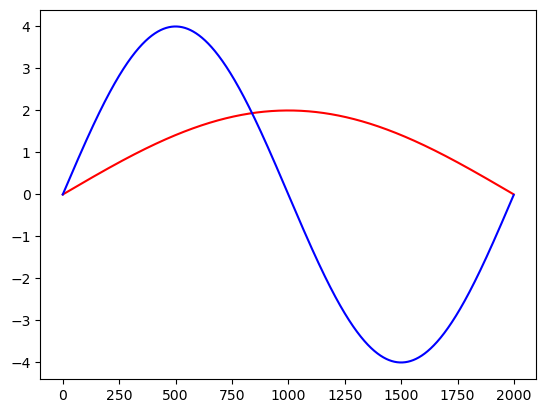

In [12]:
plt.plot(signal[0],"r")
plt.plot(signal[1],"b")

In [13]:
w = funcs.linear_decoder_training_trials(rng_decode, filtered_spikes_training_trials, signal)

In [14]:
w.shape

(10000, 2)

In [15]:
y = filtered_spikes_training_trials.dot(w)
y.shape

(4, 2000, 2)

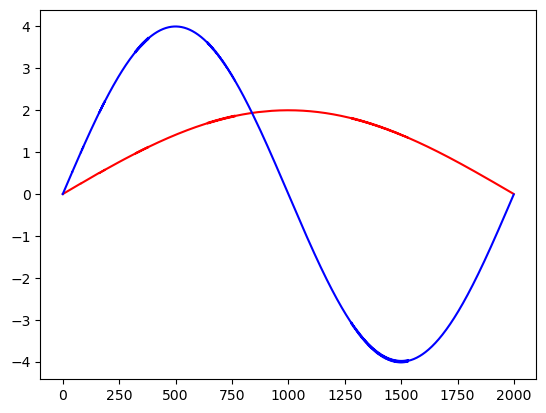

In [16]:
plt.plot(y[0,:,0],"r")
plt.plot(y[0,:,1],"b")

In [17]:
n_signals = 2
n_trials = 4

tiled_signal = np.tile(signal.T, (n_trials, 1))
tiled_signal.shape

(8000, 2)

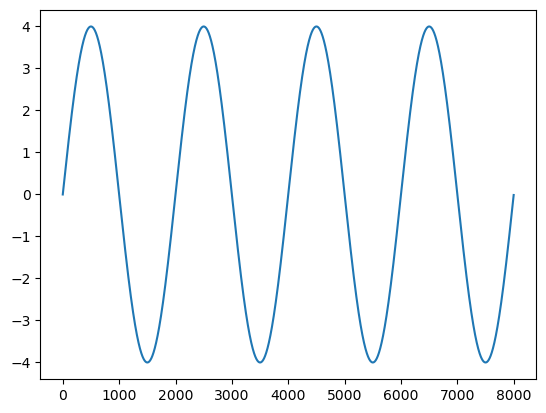

In [18]:
plt.plot(tiled_signal[:,1])